# 
 # Machine Learning Approach for Early Breast Cancer Detection: Insights from Wisconsin Diagnostic Dataset
**Submitted by: Srinivas Bobba(sribob-2@student.ltu.se)**;**MINI_PROJECT_GROUP19**; **Towards the miniproject for the course D7041E_Applied Artificial Intelligence**.

Breast Cancer is a dangerous disease that affects many women worldwide. Early detection is crucial in the treatment of breast cancer. This Study focuses on two areas: hypothesis testing and data analysis. The hypothesis testing investigates whether the mean radius of benign tumors is equal to or greater than the mean radius of malignant tumors. The data analysis explores the Breast Cancer Wisconsin (Diagnostic) Dataset to gain insights into the features that can predict whether a tumor is malignant or benign.

 <h1 style="color:blue">1.Data Collection</h1>

The Breast Cancer Wisconsin Diagnostic Dataset, available at https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic, is a widely used dataset in the field of machine learning and healthcare. It comprises features computed from digitized images of fine needle aspirates (FNA) of breast masses. Each instance in the dataset represents a diagnosed breast cancer case and includes various attributes such as mean, standard error, and worst values for key features like radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. The target variable indicates the diagnosis as either malignant (cancerous) or benign (non-cancerous). Researchers often utilize this dataset to develop and evaluate machine learning models for the early detection and diagnosis of breast cancer. Its widespread use is attributed to its accessibility, reliability, and relevance in advancing the understanding and application of predictive analytics in healthcare.

<h1 style="color:blue">2.Required Libraries</h1>

In [1]:
# Data processing
import pandas as pd
from scipy import stats

# Linear algebra
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score
from sklearn.neural_network import MLPClassifier

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Neural Network (Keras)
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.utils import to_categorical
import itertools


<h1 style="color:blue">3.Data Retrieval From UCI Repository Using Url</h1>

In [2]:
class BreastCancerData:
    def __init__(self, url):
        self.url = url
        self.column_names = ["id", "diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", 
                "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points", 
                "mean_symmetry", "mean_fractal_dimension", "se_radius", "se_texture", "se_perimeter", 
                "se_area", "se_smoothness", "se_compactness", "se_concavity", "se_concave_points", 
                "se_symmetry", "se_fractal_dimension", "worst_radius", "worst_texture", "worst_perimeter", 
                "worst_area", "worst_smoothness", "worst_compactness", "worst_concavity", "worst_concave_points", 
                "worst_symmetry", "worst_fractal_dimension"]
        
    def read_data(self):
        self.df = pd.read_csv(self.url, names=self.column_names)
        print(self.df)  # prints the dataframe
    
    def get_data_frame(self):
        return self.df
    
    def separate_data(self):
        self.benign_radius = self.df.loc[self.df["diagnosis"] == "B", "mean_radius"]
        self.malignant_radius = self.df.loc[self.df["diagnosis"] == "M", "mean_radius"]


data = BreastCancerData(url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
data.read_data()
BC_data = data.get_data_frame()

           id diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     mean_smoothness  mean_

<h1 style="color:blue">4.Statistical Hypothesis Testing on Dataset: An In-depth Analysis</h1>

In [3]:
 class BreastCancerData:
    def __init__(self, url):
        self.url = url
        self.column_names = ["id", "diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", 
                "mean_smoothness", "mean_compactness", "mean_concavity", "mean_concave_points", 
                "mean_symmetry", "mean_fractal_dimension", "se_radius", "se_texture", "se_perimeter", 
                "se_area", "se_smoothness", "se_compactness", "se_concavity", "se_concave_points", 
                "se_symmetry", "se_fractal_dimension", "worst_radius", "worst_texture", "worst_perimeter", 
                "worst_area", "worst_smoothness", "worst_compactness", "worst_concavity", "worst_concave_points", 
                "worst_symmetry", "worst_fractal_dimension"]
        
    def read_data(self):
        self.df = pd.read_csv(self.url, names=self.column_names)
        print(self.df)  # prints the dataframe
    
    def get_data_frame(self):
        return self.df
    
    def separate_data(self):
        self.benign_radius = self.df.loc[self.df["diagnosis"] == "B", "mean_radius"]
        self.malignant_radius = self.df.loc[self.df["diagnosis"] == "M", "mean_radius"]

    def formulate_hypothesis(self):
        self.h0 = "The mean radius of benign tumors is equal to the mean radius of malignant tumors."
        self.ha = "The mean radius of benign tumors is less than the mean radius of malignant tumors."

    def conduct_t_test(self):
        self.t_stat, self.p_value = stats.ttest_ind(self.benign_radius, self.malignant_radius, equal_var=False)

    def determine_confidence_level(self):
        self.confidence_level = 0.95
        self.degree_freedom = len(self.benign_radius) + len(self.malignant_radius) - 2

    def find_critical_value(self):
        self.critical_value = stats.t.ppf(self.confidence_level, self.degree_freedom)

    def compare_t_stat_and_critical_value(self):
        if self.t_stat < -self.critical_value:
            print("Reject the null hypothesis. {}".format(self.ha))
        else:
            print("Fail to reject the null hypothesis. {}".format(self.h0))

    def compare_p_value_and_alpha(self):
        self.alpha = 0.05
        if self.p_value < self.alpha:
            print("Reject the null hypothesis. {}".format(self.ha))
        else:
            print("Fail to reject the null hypothesis. {}".format(self.h0))

    def run_hypothesis_testing(self):
        self.read_data()
        self.separate_data()
        self.formulate_hypothesis()
        self.conduct_t_test()
        self.determine_confidence_level()
        self.find_critical_value()
        self.compare_t_stat_and_critical_value()
        self.compare_p_value_and_alpha()

    def print_results(self):
        print("Test results:")
        print("-" * 30)
        print("t-statistic: {}".format(self.t_stat))
        print("p-value: {}".format(self.p_value))
        print("critical value: {}".format(self.critical_value))
        print("degree of freedom: {}".format(self.degree_freedom))
        print("confidence level: {}".format(self.confidence_level))
        print("alpha: {}".format(self.alpha))
        


data = BreastCancerData(url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
  
data.run_hypothesis_testing()
data.print_results()


           id diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     mean_smoothness  mean_

The results of the hypothesis test indicate a statistically significant difference in the mean radius between benign and malignant tumors. With a t-statistic of -22.21 and an extremely low p-value (1.68e-64), we reject the null hypothesis. This suggests that the mean radius of benign tumors is significantly less than the mean radius of malignant tumors. The t-statistic falls far beyond the critical value at a 95% confidence level, providing strong evidence to support this conclusion.

<h1 style="color:blue">5.Data Preprocessing </h1>

In [4]:
# Display information about the dataset and check if there are any null values in each column
BC_data.isnull().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
se_radius                  0
se_texture                 0
se_perimeter               0
se_area                    0
se_smoothness              0
se_compactness             0
se_concavity               0
se_concave_points          0
se_symmetry                0
se_fractal_dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### Split the column names based on Mean, Standard error or worst

In [5]:
# Mean Column
BC_data_mean = BC_data.loc[:,["diagnosis", "mean_radius", "mean_texture","mean_perimeter",
                             "mean_area", "mean_smoothness","mean_compactness", "mean_concavity",
                             "mean_symmetry","mean_fractal_dimension","mean_concave_points"]]

In [6]:
#Display the BC_data_mean data
BC_data_mean

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,mean_concave_points
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871,0.14710
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667,0.07017
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999,0.12790
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744,0.10520
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883,0.10430
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,0.13890
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,0.09791
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,0.05302
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,0.15200


In [7]:
# Standard Error(se) Column
BC_data_se = BC_data.loc[:,["diagnosis", "se_radius", "se_texture",
            "se_perimeter", "se_area", "se_smoothness", "se_compactness", 
            "se_concavity", "se_concave_points", "se_symmetry", 
            "se_fractal_dimension" ]]

In [8]:
#Display the BC_data_se data
BC_data_se

,diagnosis,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension
0,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,M,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...
564,M,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,M,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,M,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,M,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


In [9]:
# Column name ends with 'worst'
BC_data_worst = BC_data.loc[:,["diagnosis", "worst_radius", 
               "worst_texture","worst_perimeter", "worst_area",                                
               "worst_smoothness", "worst_compactness", "worst_concavity",
               "worst_concave_points", "worst_symmetry", 
               "worst_fractal_dimension" ]]

In [10]:
#Display the BC_data_worst data
BC_data_worst

,diagnosis,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,M,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,M,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<h1 style="color:blue">6.Data Visualization/Data Exploration </h1>

In [11]:
# Display number of Malignant and Benign in diagnosis column
BC_data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

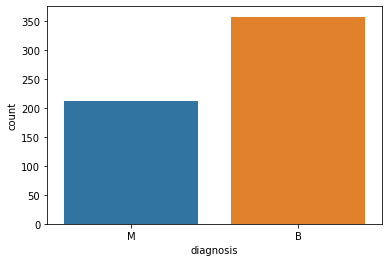

In [12]:
#Visualise the count of values in diagnosis column
sns.countplot(BC_data["diagnosis"], label = 'count')

In [13]:
# Feature names in three list
list_worst=["diagnosis", "worst_radius", 
               "worst_texture","worst_perimeter", "worst_area",                                
               "worst_smoothness", "worst_compactness", "worst_concavity",
               "worst_concave_points", "worst_symmetry", 
               "worst_fractal_dimension" ]
list_se=["diagnosis", "se_radius", "se_texture",
            "se_perimeter", "se_area", "se_smoothness", "se_compactness", 
            "se_concavity", "se_concave_points", "se_symmetry", 
            "se_fractal_dimension" ]
list_mean = ["diagnosis", "mean_radius", "mean_texture","mean_perimeter",
                             "mean_area", "mean_smoothness","mean_compactness", "mean_concavity",
                             "mean_symmetry","mean_fractal_dimension","mean_concave_points"]

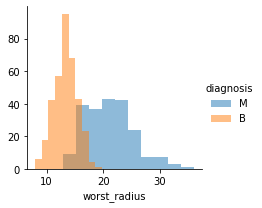

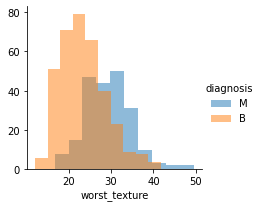

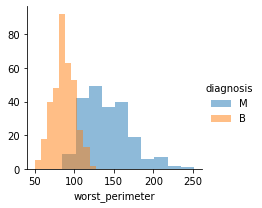

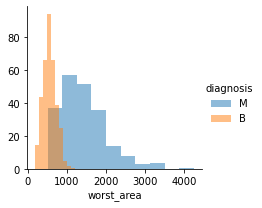

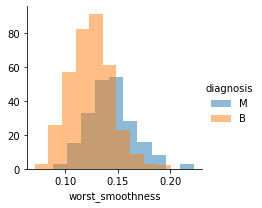

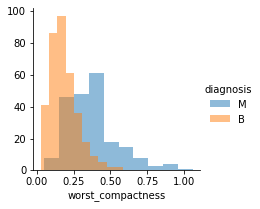

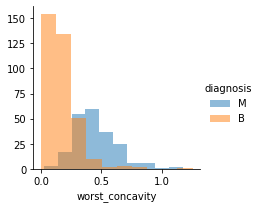

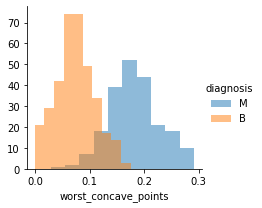

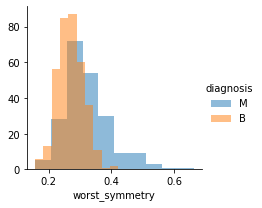

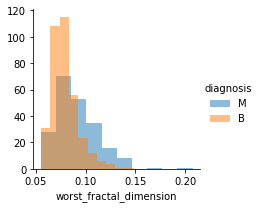

In [14]:
#Visualise each feature in 'worst' group by diagnostic result
for i in range(1,11): 
    
    grid = sns.FacetGrid(BC_data_worst, hue='diagnosis')
    grid.map(plt.hist,list_worst[i], 
                alpha=.5, bins=10)
    grid.add_legend()
plt.show()

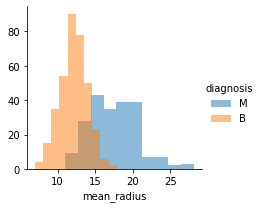

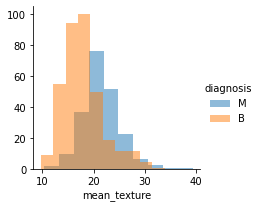

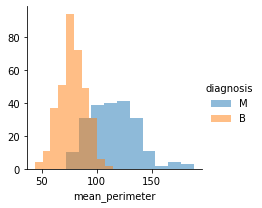

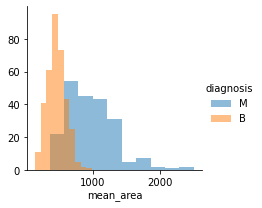

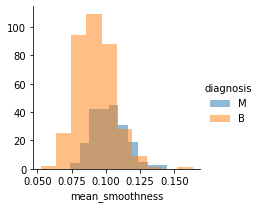

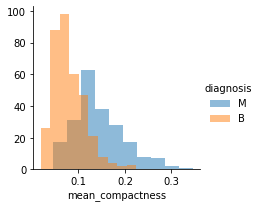

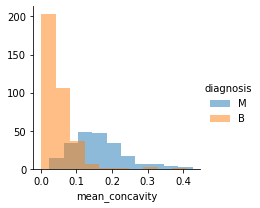

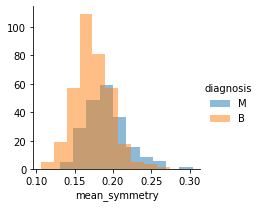

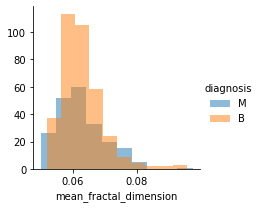

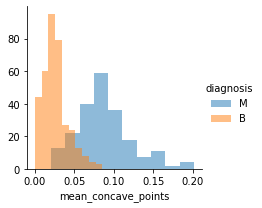

In [15]:
#Visualise each feature in 'mean' group by diagnostic result
for i in range(1,11):    
    grid = sns.FacetGrid(BC_data_mean, hue='diagnosis')
    grid.map(plt.hist,list_mean[i], 
                alpha=.5, bins=10)
    grid.add_legend()

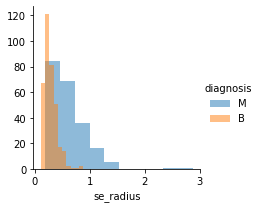

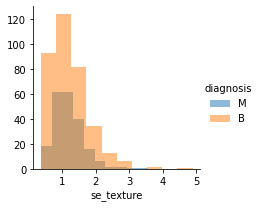

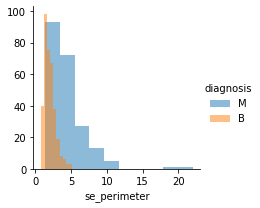

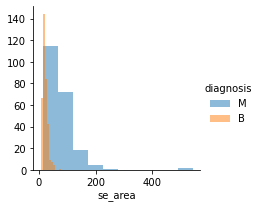

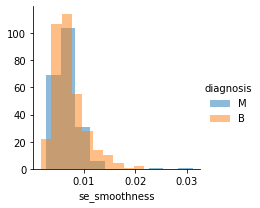

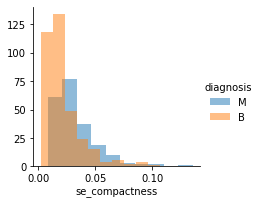

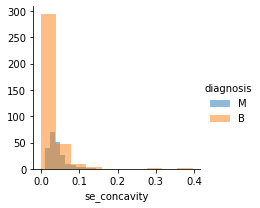

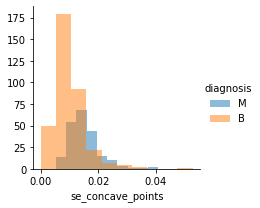

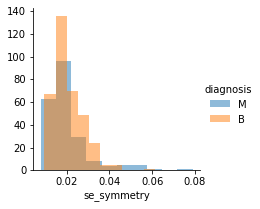

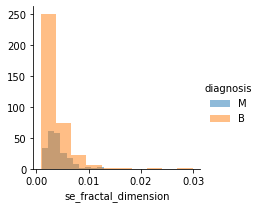

In [16]:
#Visualise each feature in 'se' group by diagnostic result
for i in range(1,11):    
    grid = sns.FacetGrid(BC_data_se, hue='diagnosis')
    grid.map(plt.hist,list_se[i], 
                alpha=.5, bins=10)
    grid.add_legend()

This allows us to visually analyze and compare the distribution of each feature based on the diagnostic result, which can be useful in identifying which features are more indicative of malignancy or benignity.

### Correlation

The advantage of visualizing the correlation with a heatmap is that it allows us to quickly identify which features are highly correlated with each other. Highly correlated features can cause issues in machine learning models, such as overfitting or instability. By identifying these highly correlated features, we can make informed decisions about which features to keep in our model and which ones to drop. Additionally, the heatmap provides a visual representation of the strength and direction of the correlations, making it easier to interpret the relationships between the features.

In [17]:
#Compute the correlation among the variables except id, target
correlation = BC_data.iloc[:,2:32].corr()
correlation

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean_compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean_concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean_concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean_symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean_fractal_dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

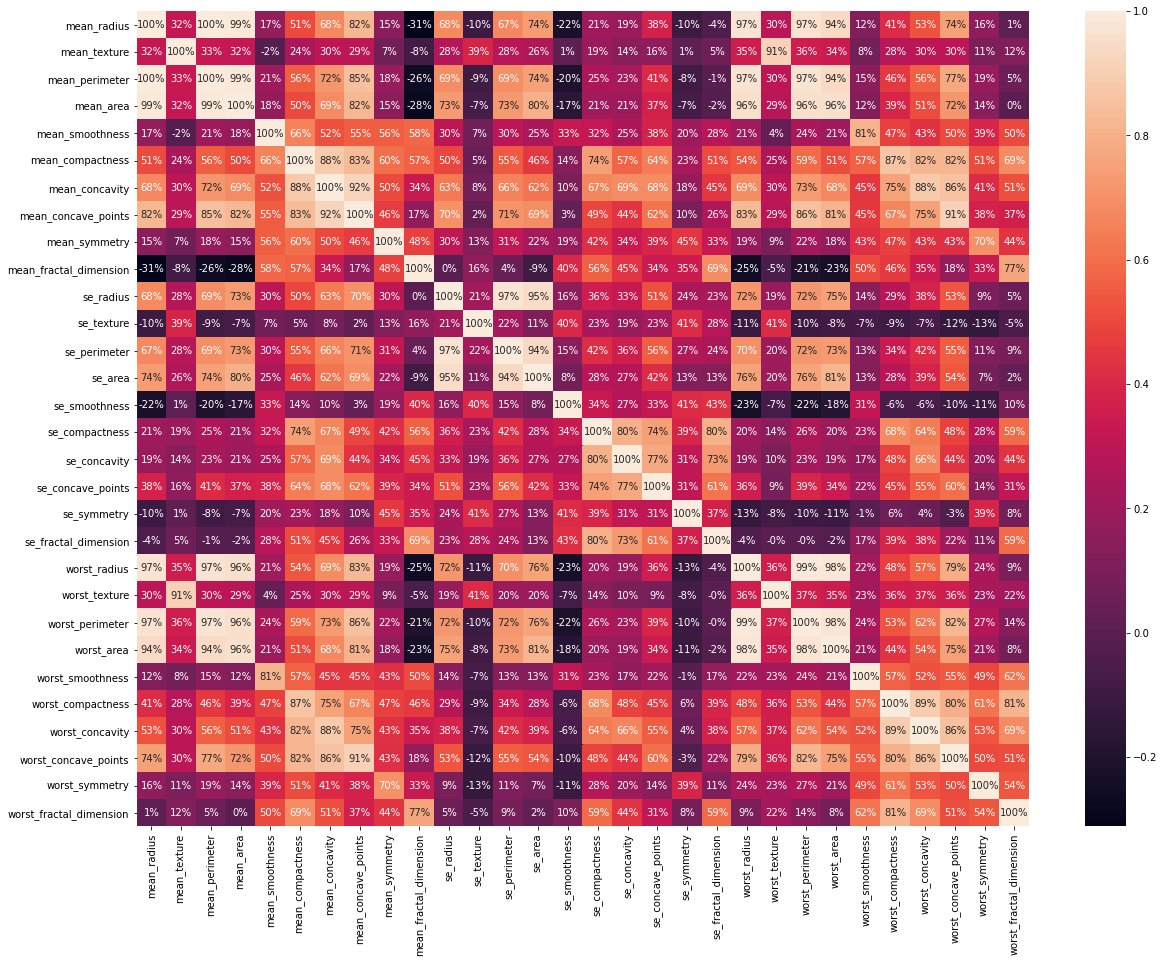

In [18]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation, annot = True,fmt = '.0%') 

In [19]:
# Dimension of correlation dataset
size=correlation.shape[0]
size

30

### Remove the variables with more than 0.9 correlation

In [20]:
#All features except id and diagnosis 
BC_Data1=BC_data.iloc[:,2:32]

In [21]:
# Removing features which has .9 or more correlation
total_column = np.full((size,), True, dtype = bool)
for x in range(size):
    for y in range(x+1, size):
        if correlation.iloc[x,y]>= 0.9:
            print(x,y)
            print(correlation.iloc[x,y])
            if total_column[y]:
                total_column[y]= False
filtered_columns = BC_Data1.columns[total_column]
final_data = BC_data[filtered_columns]

0 2
0.9978552814938109
0 3
0.9873571700566127
0 20
0.9695389726112055
0 22
0.9651365139559871
0 23
0.9410824595860461
1 21
0.912044588840421
2 3
0.9865068039913907
2 20
0.9694763634663146
2 22
0.9703868870426394
2 23
0.9415498080023068
3 20
0.9627460860470841
3 22
0.9591195743552645
3 23
0.9592133256498998
6 7
0.9213910263788588
7 27
0.9101553142985918
10 12
0.9727936770160764
10 13
0.951830112110991
12 13
0.9376554069544157
20 22
0.993707916102949
20 23
0.9840145644590742
22 23
0.9775780914063871


In [22]:
# Dispaly correlation for 20 variables which we get after reduction
corr_after_reduction =final_data.corr()
corr_after_reduction

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_smoothness,worst_compactness,worst_concavity,worst_symmetry,worst_fractal_dimension
mean_radius,1.000000,0.323782,0.170581,0.506124,0.676764,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.413463,0.526911,0.163953,0.007066
mean_texture,0.323782,1.000000,-0.023389,0.236702,0.302418,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.277830,0.301025,0.105008,0.119205
mean_smoothness,0.170581,-0.023389,1.000000,0.659123,0.521984,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.472468,0.434926,0.394309,0.499316
mean_compactness,0.506124,0.236702,0.659123,1.000000,0.883121,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.865809,0.816275,0.510223,0.687382
mean_concavity,0.676764,0.302418,0.521984,0.883121,1.000000,0.500667,0.336783,0.631925,0.076218,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.448822,0.754968,0.884103,0.409464,0.514930
mean_symmetry,0.147741,0.071401,0.557775,0.602641,0.500667,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.473200,0.433721,0.699826,0.438413
mean_fractal_dimension,-0.311631,-0.076437,0.584792,0.565369,0.336783,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.458798,0.346234,0.334019,0.767297
se_radius,0.679090,0.275869,0.301467,0.497473,0.631925,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.287103,0.380585,0.094543,0.049559
se_texture,-0.097317,0.386358,0.068406,0.046205,0.076218,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.092439,-0.068956,-0.128215,-0.045655
se_smoothness,-0.222600,0.006614,0.332375,0.135299,0.098564,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,-0.055558,-0.058298,-0.107342,0.101480


In [23]:
# Name of 20 features which we get for final analysis
filtered_columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness',
       'mean_concavity', 'mean_symmetry', 'mean_fractal_dimension',
       'se_radius', 'se_texture', 'se_smoothness', 'se_compactness',
       'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dimension', 'worst_smoothness', 'worst_compactness',
       'worst_concavity', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [24]:
# Display dimension of data after reduction
corr_after_reduction.shape

(20, 20)

<AxesSubplot:>

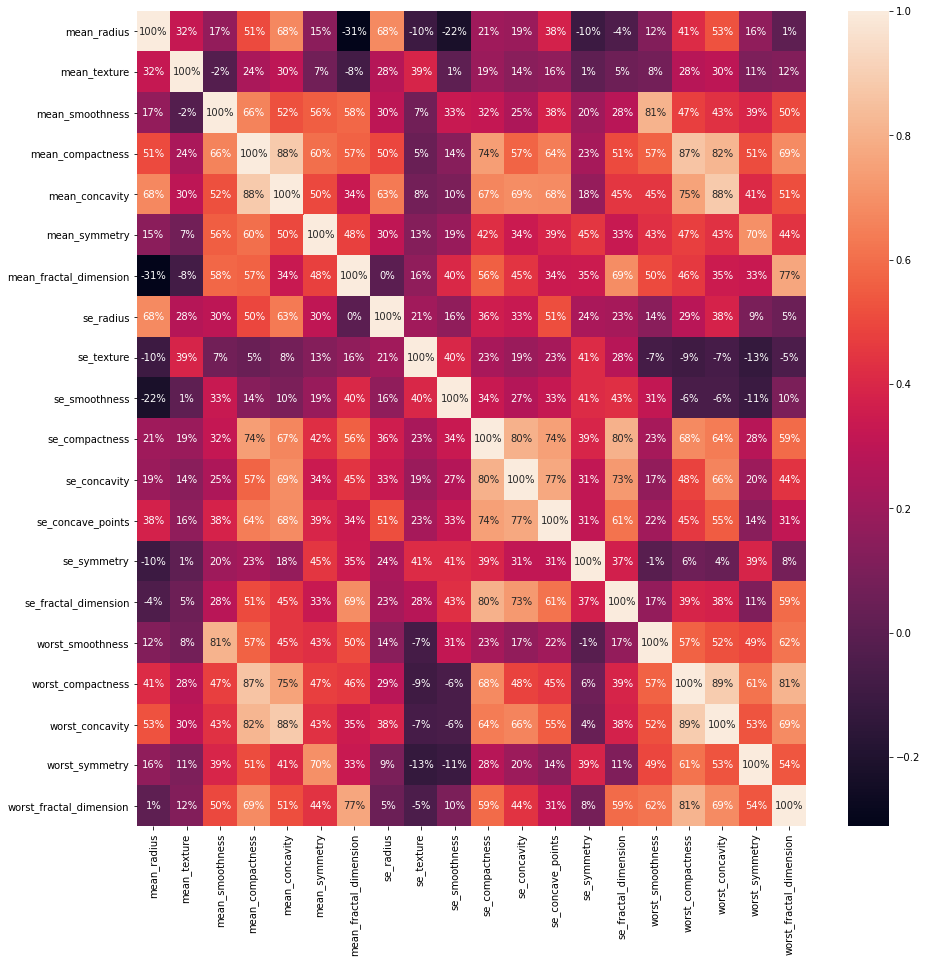

In [25]:
# visualize the correlation with heat map for final data which has 20 feature
plt.figure(figsize = (15,15))
sns.heatmap(corr_after_reduction, annot = True,fmt = '.0%') 

In [26]:
# Data frame for target column
target = pd.DataFrame()
target['diagnosis'] = BC_data.iloc[:,1]
target['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

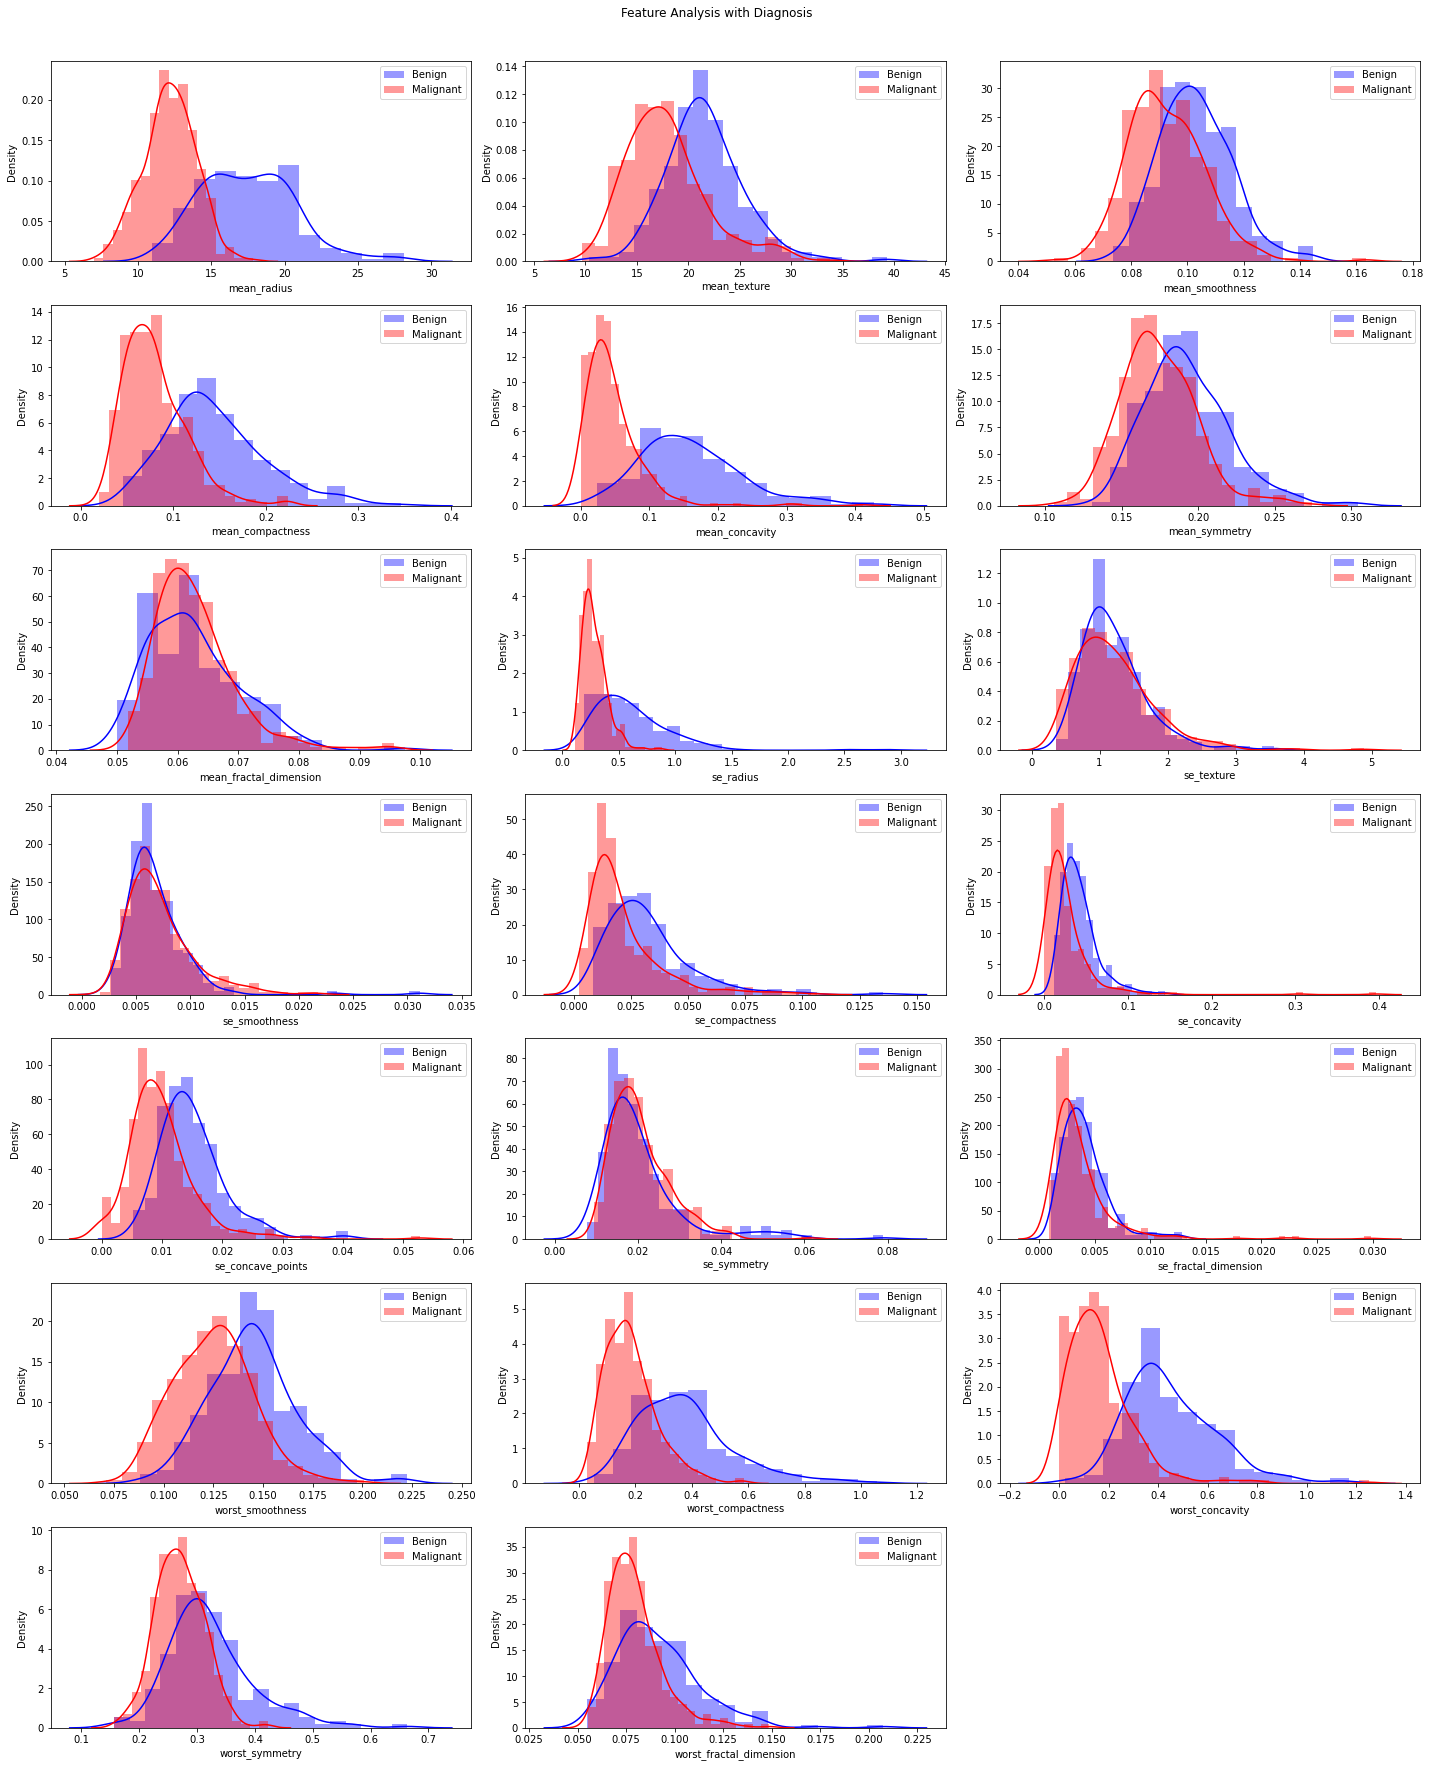

In [27]:
# Visualize all 20 features with respect to diagnosis
fig = plt.figure(figsize = (20, 25))
y = 0
for x in final_data.columns:
    plt.subplot(7, 3, y+1)
    y += 1
    sns.distplot(final_data[x][target['diagnosis']=='M'], color='blue', label = 'Benign')
    sns.distplot(final_data[x][target['diagnosis']=="B"], color='red', label = 'Malignant')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis with Diagnosis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

The above analysis allows us to visually analyze the distribution of each feature with respect to the diagnosis (Malignant or Benign). This can help us identify features that are more indicative of a certain diagnosis and can aid in the development of a predictive model. It also allows for quick identification of any significant differences in feature distribution between the two diagnosis categories. Additionally, plotting all 20 features in one figure allows for easy comparison between them.

<h1 style="color:blue">7.Data Transformation </h1>

In [28]:
#Encode the categorical data values
lblencoder_d= LabelEncoder()
BC_data.iloc[:,1] = lblencoder_d.fit_transform(BC_data.iloc[:,1].values)

In [29]:
# Split the data set into independent(predictors) and dependent (target)
X=final_data.values
Y=BC_data.iloc[:,1]

### Standardisation
Scale all numerical features in X using sklearn's StandardScaler class

In [30]:
#Perform standardisation
datascaled = StandardScaler()
X= datascaled.fit_transform(X)

### Dimentionality Reduction-Principal Component Analysis(PCA)
PCA is used for dimentionality reduction and to know the variance of the data set.Using the singular value decomposition of the data array, PCA is an unsupervised approach for reducing the linear dimensionality of the data set. The information is linearly projected onto a principal component orthogonal basis. The most variance is explained by the first component, followed by the second and so on.First, PCA will be used without dimensionality reduction. We should apply standard scaling beforehand because PCA might be extremely sensitive to scale.

In [31]:
pca = PCA()
out = pca.fit_transform(X)
out.shape

(569, 20)

In [32]:
pca.explained_variance_ratio_

array([0.42612628, 0.1345146 , 0.11914446, 0.07593734, 0.05964707,
       0.05546436, 0.0247255 , 0.02167877, 0.01773619, 0.01384497,
       0.01319685, 0.01031187, 0.00901192, 0.00642619, 0.00390252,
       0.00276869, 0.0021893 , 0.00149748, 0.00116023, 0.00071541])

In [33]:
pca.explained_variance_ratio_.cumsum()

array([0.42612628, 0.56064087, 0.67978533, 0.75572267, 0.81536974,
       0.87083411, 0.89555961, 0.91723838, 0.93497457, 0.94881954,
       0.96201638, 0.97232826, 0.98134018, 0.98776636, 0.99166888,
       0.99443756, 0.99662687, 0.99812435, 0.99928459, 1.        ])

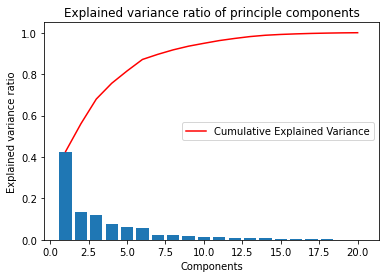

In [34]:
datascaled = StandardScaler()
X= datascaled.fit_transform(X)
pca = PCA()
pca.fit(X)
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_ratio_)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.ylabel('Explained variance ratio')
plt.xlabel('Components')
plt.title('Explained variance ratio of principle components')
plt.legend(loc='center right')
plt.show()

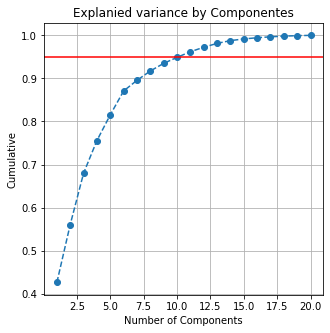

In [35]:
# Choose the number of components based on cumulative variance
plt.figure(figsize=(5,5))
plt.plot(range(1,21),pca.explained_variance_ratio_.cumsum(), marker='o',linestyle='--')
plt.title('Explanied variance by Componentes')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative')
plt.axhline(y=.95, xmin=0, xmax=20,color='red')
plt.grid()
plt.show()

**Determine the optimal number of components:** By looking at the point where the cumulative variance reaches a plateau or levels off, we can identify the optimal number of components to retain. In this case, we may choose to retain the first 10 principal components as they explain more than 95% of the variance in the data.

Now, We have chosen 10 principal components to explain more than 0.95 of the variance.

In [36]:
pca1 = PCA(n_components = 10)
pca1.fit(X)

PCA(n_components=10)

In [37]:
final = pca1.transform(X)
final

array([[ 7.2846712 , -1.20827122, -1.85876588, ..., -0.83958323,
         0.73037313,  0.54831204],
       [-0.93587884, -1.83267105,  0.63675011, ..., -0.33593063,
        -0.72630515,  0.30088547],
       [ 3.15168888, -1.90373662,  0.55530153, ..., -0.1416524 ,
        -0.45068809, -0.53046491],
       ...,
       [-0.21932316, -1.30273255,  2.09715051, ..., -0.12149774,
        -0.70226728, -0.58338283],
       [ 8.40049487, -2.60652432, -0.15216586, ..., -0.12800854,
         0.21755489, -0.3958472 ],
       [-4.22562471,  1.11998686,  0.87376778, ..., -1.48986281,
        -0.53711177,  0.82806448]])

In [38]:

# new data frame with 10 component and assign name for each component
pca_df = pd.DataFrame( data =  final,
                    columns = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [39]:
# attach the diagnosis column to PCA new data frame
pca_df['Response'] = BC_data['diagnosis']

In [40]:
# Display top rows
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Response
0,7.284671,-1.208271,-1.858766,-0.836040,0.642161,-2.406943,-1.656136,-0.839583,0.730373,0.548312,1
1,-0.935879,-1.832671,0.636750,0.279874,-0.244476,-0.824172,-0.315330,-0.335931,-0.726305,0.300885,1
2,3.151689,-1.903737,0.555302,-0.696233,0.108278,-0.893050,0.213089,-0.141652,-0.450688,-0.530465,1
3,11.347898,2.319956,-5.442608,-1.917882,3.270746,0.121826,-0.383612,-1.990400,1.161937,-0.429158,1
4,1.384769,-0.726611,1.644099,-0.005704,-2.077323,-1.971702,0.603534,-0.336399,-0.191956,0.447599,1


### Scatter plot between Pc1 and Pc2 component since it explains approximately 65% of information

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

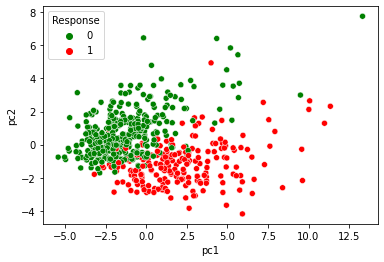

In [41]:
# Visualize component1 and component2
sns.scatterplot('pc1','pc2',hue='Response',data=pca_df,palette=['g','r'])


The visualization of the first two principal components in a PCA analysis serves as a valuable tool for gaining insights into complex datasets. It aids in pattern identification, revealing clusters or relationships that may be obscured in other analyses. This visual approach not only enhances communication of results, especially to non-technical audiences, but also facilitates the validation of assumptions made during the analysis, such as linearity or data distribution. Additionally, this method proves effective in pinpointing outliers, prompting further investigation into potentially anomalous data points. we conclude from this analysis, data is linearly distributed and no outliers.

<h1 style="color:blue">8.Feature Selection </h1>
Feature selection is the process of selecting a subset of the most relevant features from a larger set of features in a dataset. The goal of feature selection is to reduce the dimensionality of the data and remove irrelevant or redundant features that may negatively impact the performance of machine learning algorithms.

### Important Features or Variable Importance
To visualize which variables are the most influential on the first 2 components

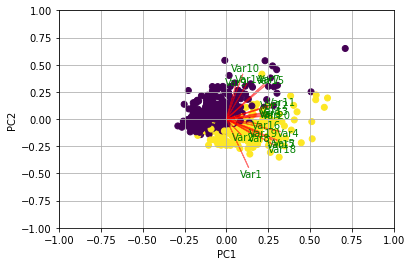

In [42]:
def biplot(score,coeff,labels=None):
    s1 = score[:,0]
    s2 = score[:,1]
    n=coeff.shape[0]
    scalex = 1.0/(s1.max()- s1.min())
    scaley = 1.0/(s2.max()- s2.min())
    plt.scatter(s1 * scalex,s2 * scaley, c = pca_df.iloc[:,-1])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
            
            
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
 
biplot(final[:,0:2],np.transpose(pca1.components_[0:2, :]))
plt.show()

Now, in the above Biplot the importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude - higher importanc

In [43]:
#Let's check the PC explained variance.
pca1.explained_variance_ratio_

array([0.42612628, 0.1345146 , 0.11914446, 0.07593734, 0.05964707,
       0.05546436, 0.0247255 , 0.02167877, 0.01773619, 0.01384497])

PC1 explains 42% of the information and PC2 13% of information. Together, PC1 and PC2 only explain 55% of information.

Now, let's find the most important features.

In [44]:
# Each variable's variance in each component
abs(pca1.components_ )

array([[1.32037515e-01, 8.65416182e-02, 2.26589267e-01, 3.19548976e-01,
        3.01093179e-01, 2.27708080e-01, 2.23447406e-01, 1.69612240e-01,
        5.36124163e-02, 9.74162025e-02, 2.83931331e-01, 2.52462094e-01,
        2.50535394e-01, 1.21786697e-01, 2.29604985e-01, 2.05937616e-01,
        2.88112018e-01, 2.89154562e-01, 1.92610186e-01, 2.59331142e-01],
       [4.42178530e-01, 1.42663299e-01, 3.63868459e-02, 1.13593919e-01,
        1.92943336e-01, 5.10939434e-02, 3.19060640e-01, 1.51757321e-01,
        2.95970559e-01, 4.11195626e-01, 1.38647765e-01, 1.15004295e-01,
        6.72494808e-02, 3.20888971e-01, 3.07380940e-01, 4.68864397e-02,
        2.00871072e-01, 2.40209941e-01, 1.13908542e-01, 3.00280149e-02],
       [2.78536926e-01, 2.44568317e-01, 2.23909288e-01, 1.97921113e-02,
        1.42917221e-01, 1.31562203e-01, 2.56013870e-01, 3.57086472e-01,
        3.06534691e-01, 9.08184507e-02, 1.53912036e-01, 2.11096311e-01,
        2.80162331e-01, 1.17441110e-01, 1.03706410e-01, 3.4060

From the above analysis, pca1.components_ has shape (row=n_components, column=n_features). Thus, by looking at the PC1 (First Principal Component) which is the first row: (1.32037515e-01 8.65416182e-02 2.26589267e-01 3.19548976e-01 3.01093179e-01 2.27708080e-01 2.23447406e-01 1.69612240e-01 5.36124163e-02 9.74162025e-02 2.83931331e-01 2.52462094e-01 2.50535394e-01 1.21786697e-01 2.29604985e-01 2.05937616e-01 2.88112018e-01 2.89154562e-01 1.92610186e-01 2.59331142e-01) we can conclude that feature 1, 3 and 4 (or Var 1, 3 and 4 in the biplot) are the most important.

In [45]:
#Assign total dimension of PCA data frame to the new variable
n_pcs= pca1.components_.shape[0]
print('Dimension of pca data frame : ',n_pcs)

Dimension of pca data frame :  10


In [46]:
most_important_index = [np.abs(pca1.components_[i]).argmax() for i in range(n_pcs)]
print('Index of most important feature are :  ', most_important_index)

Index of most important feature are :   [3, 0, 7, 5, 18, 1, 9, 8, 5, 11]


In [47]:
# Assign name of each feature to list
feature_names = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [48]:
most_important_names = [feature_names[most_important_index[i]] for i in range(n_pcs)]

In [49]:
important_dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


In [50]:
importance_df = pd.DataFrame(important_dic.items())
print('Most Important Feature in Each Component')
importance_df

Most Important Feature in Each Component


,0,1
0,PC0,compactness_mean
1,PC1,radius_mean
2,PC2,radius_se
3,PC3,symmetry_mean
4,PC4,symmetry_worst
5,PC5,texture_mean
6,PC6,smoothness_se
7,PC7,texture_se
8,PC8,symmetry_mean
9,PC9,concavity_se


In [51]:
#Split the column into dependent nd independent for pca data frame
X = pca_df.iloc[:,0:10]

#Y will tell us if a patient has cancer or not
Y = pca_df.iloc[:,-1].values
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Response
0,7.284671,-1.208271,-1.858766,-0.836040,0.642161,-2.406943,-1.656136,-0.839583,0.730373,0.548312,1
1,-0.935879,-1.832671,0.636750,0.279874,-0.244476,-0.824172,-0.315330,-0.335931,-0.726305,0.300885,1
2,3.151689,-1.903737,0.555302,-0.696233,0.108278,-0.893050,0.213089,-0.141652,-0.450688,-0.530465,1
3,11.347898,2.319956,-5.442608,-1.917882,3.270746,0.121826,-0.383612,-1.990400,1.161937,-0.429158,1
4,1.384769,-0.726611,1.644099,-0.005704,-2.077323,-1.971702,0.603534,-0.336399,-0.191956,0.447599,1
...,...,...,...,...,...,...,...,...,...,...,...
564,1.921729,-1.726831,3.333806,-0.756528,-2.953762,-0.608214,0.207326,0.182170,-0.634628,0.444733,1
565,0.214139,-1.282271,3.405017,-1.315272,-0.049790,1.513012,-0.410779,0.986550,0.248048,0.014051,1
566,-0.219323,-1.302733,2.097151,1.347036,-0.115790,1.299400,0.491402,-0.121498,-0.702267,-0.583383,1
567,8.400495,-2.606524,-0.152166,-0.307609,0.952772,1.812362,-0.230736,-0.128009,0.217555,-0.395847,1


<h1 style="color:blue">9.Building  and Validation of the models using Supervised Machine Learning algorithms </h1>
 
 The Logistic Regression, Decision Tree, and Random Forest Classifier models are implemented using the scikit-learn library. The KNN and SVM models are also implemented using scikit-learn, but with specific parameters passed to the constructor.

Split the data into 70% of training data and 30% of test data for both dependent and independent variables
Validation of a model refers to the process of evaluating the performance of the model on a dataset that is independent of the data that was used to train the model. The main purpose of model validation is to estimate the model's ability to generalize to new, unseen data.
Validation is important because it helps to identify potential problems with the model, such as overfitting or underfitting, and to tune the model's hyperparameters to achieve better performance. By using a validation set, we can get a more accurate estimate of how the model will perform on new, unseen data, which is the ultimate goal of any machine learning model.

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.3,stratify=Y)

In [53]:
X_train

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
24,2.184965,-2.045020,-1.214297,-1.339305,-0.899033,0.266375,-0.017283,-0.133857,-0.330070,0.861987
382,-0.420126,1.108135,1.740109,3.324070,1.118306,1.102313,-0.432450,-0.783142,0.783699,-0.914487
510,-0.197541,1.149202,-0.131135,2.659116,0.361782,-0.874109,-0.118898,-0.908857,0.183474,-0.362207
220,-2.016858,-0.691627,-1.381184,1.515644,-0.982053,-0.759247,-0.561719,-0.469244,0.760009,-0.162340
456,-0.291294,1.070037,1.142534,-1.344271,0.456394,2.676848,0.994535,0.553759,0.318879,0.234909
...,...,...,...,...,...,...,...,...,...,...
277,-2.170637,-1.361064,1.522354,-0.332976,-0.566326,-0.686467,1.386739,0.015396,0.098273,-0.289337
474,0.044348,-0.093069,-2.298803,1.877863,-0.206043,-0.038267,-0.806926,-0.014581,-0.294435,-0.143400
126,-0.969657,-1.560985,-1.160707,-0.196157,0.592806,1.395675,0.614875,0.327345,-0.226501,0.329103
506,0.418762,0.030584,-1.508030,0.309741,-0.455745,0.140046,-0.120127,1.032087,-1.008153,-0.027171


In [54]:
Y_test

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [55]:
#create a function for the models
def models(X_train, Y_train):
    list_accuracy =[]
    
    #Mode0 --> Logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    list_accuracy.append(log.score(X_train, Y_train))
    
    #Model1 --> Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    list_accuracy.append(tree.score(X_train, Y_train))
             
    #Model2 --> Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    list_accuracy.append(forest.score(X_train, Y_train))
    
    #Model3 --> kNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    KNN = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
    KNN.fit(X_train, Y_train)
    list_accuracy.append(KNN.score(X_train, Y_train))
    
    #Model4 --> SVM
    from sklearn.svm import SVC
    svc = SVC(gamma=0.025, C=3)
    svc.fit(X_train,Y_train)
    list_accuracy.append(svc.score(X_train, Y_train))
    
    #Print the result of the models
    print('1) Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('2) DecisionTreeClaassifier Training Accuracy:', tree.score(X_train, Y_train))           
    print('3) Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    print('4) kNeighbors Training Accuracy:', KNN.score(X_train, Y_train))
    print('5) Support Vector Machine Training Accuracy:', svc.score(X_train, Y_train)) 
    return log, tree, forest, KNN, svc,list_accuracy

In [56]:
model = models(X_train, Y_train)

1) Logistic Regression Training Accuracy: 0.9773869346733668
2) DecisionTreeClaassifier Training Accuracy: 1.0
3) Random Forest Classifier Training Accuracy: 0.9949748743718593
4) kNeighbors Training Accuracy: 1.0
5) Support Vector Machine Training Accuracy: 0.9798994974874372


 <h1 style="color:blue">10.Evaluation of The Models/ Performance Metrics </h1>
 



Logistic Regression metrics:
AUC: 0.959
Recall: 0.938
Specificity: 0.981


Decision Tree metrics:
AUC: 0.888
Recall: 0.859
Specificity: 0.916


Random Forest metrics:
AUC: 0.922
Recall: 0.891
Specificity: 0.953


kNeighbors Training metrics:
AUC: 0.939
Recall: 0.906
Specificity: 0.972


Support Vector Machine metrics:
AUC: 0.975
Recall: 0.969
Specificity: 0.981



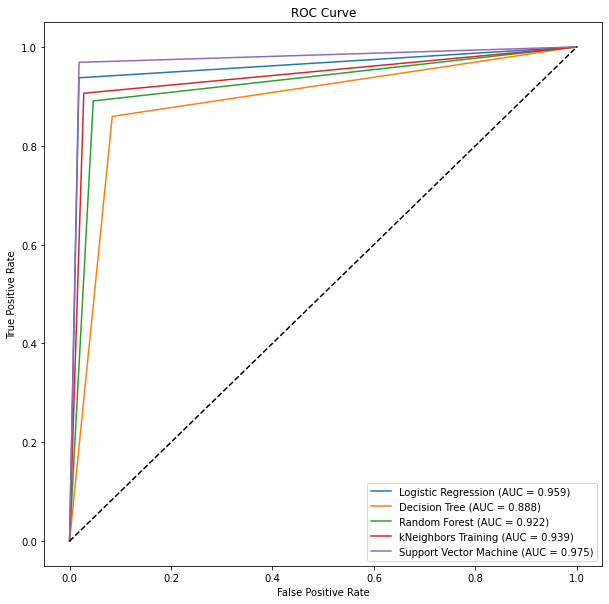

In [57]:

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('kNeighbors Training', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

fig = plt.figure(figsize=(10,10))

for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    auc = roc_auc_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    fpr, tpr, _ = roc_curve(Y_test, y_pred)

    # plot the metrics
    print("")
    print(f'{name} metrics:')
    print(f'AUC: {auc:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Specificity: {specificity:.3f}')
    print("")

    # plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


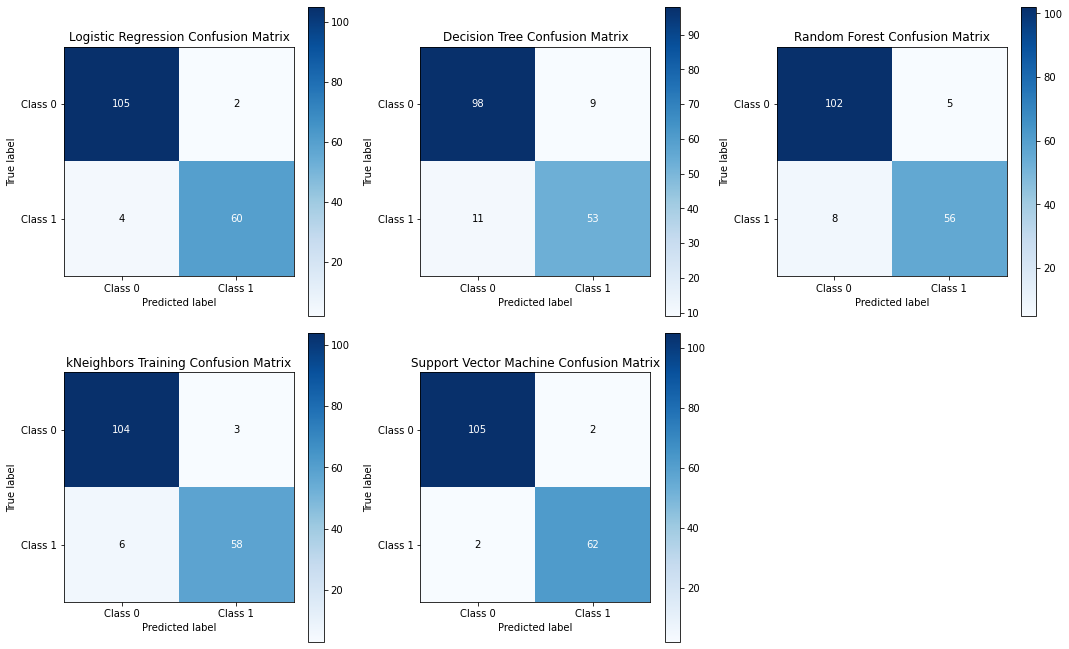

In [58]:
# Assuming X_train, Y_train, X_test, Y_test are defined

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('kNeighbors Training', KNeighborsClassifier()),
    ('Support Vector Machine', SVC())
]

num_models = len(models)
num_rows = num_models // 3 + (num_models % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=min(num_models, 3), figsize=(15, 5 * num_rows))

for (name, model), ax in zip(models, axes.flatten()):
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Get confusion matrix
    cm = confusion_matrix(Y_test, y_pred)

    # Plot the confusion matrix
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # Add labels and title
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=['Class 0', 'Class 1'],
           yticklabels=['Class 0', 'Class 1'],
           title=f'{name} Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Annotate the confusion matrix
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black")

# Remove empty subplots if there are more than one row
if num_rows > 1 and num_models % 3 > 0:
    for i in range(num_models % 3, 3):
        fig.delaxes(axes[-1, i])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


 <h1 style="color:blue">11.Building and Evaluation of Models using Neural Network Algorithms </h1>
 


### Multi-Layer Perceptron(MLP)

In [59]:
# We have already splited  data into X_train, X_test, Y_train, Y_test

# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-Layer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, Y_train)

# Predictions and evaluation
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(Y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)
print("Classification Report:")
print(classification_report(Y_test, mlp_predictions))




MLP Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.97      0.95      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



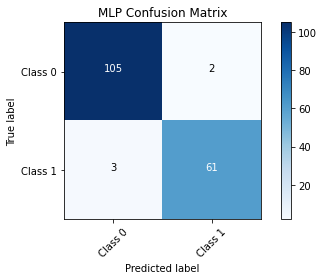

In [60]:
# We have already split data into X_train, X_test, Y_train, Y_test
from sklearn.neural_network import MLPClassifier
import itertools


# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi-Layer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, Y_train)

# Predictions
mlp_predictions = mlp_model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(Y_test, mlp_predictions)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('MLP Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


### Convolutional Neural Network (CNN)

Epoch 1/10
10/10 [==============================] - 1s 29ms/step - loss: 0.6379 - accuracy: 0.7547 - val_loss: 0.5875 - val_accuracy: 0.7875
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.5308 - accuracy: 0.8145 - val_loss: 0.4949 - val_accuracy: 0.8125
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4376 - accuracy: 0.8679 - val_loss: 0.4040 - val_accuracy: 0.8625
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3424 - accuracy: 0.9025 - val_loss: 0.3340 - val_accuracy: 0.9250
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2632 - accuracy: 0.9497 - val_loss: 0.2679 - val_accuracy: 0.9250
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2007 - accuracy: 0.9560 - val_loss: 0.2263 - val_accuracy: 0.9250
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.1565 - accuracy: 0.9717 - val_loss: 0.2021 - val_accuracy: 0.9250
Epoch 8/10
10/10 [=

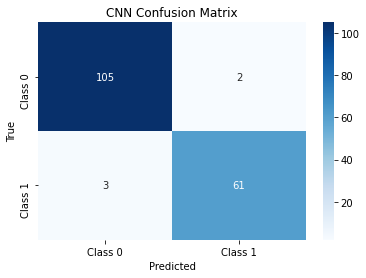

CNN Accuracy: 0.9707602339181286
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.97      0.95      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [61]:
# Assuming you have X_train_scaled, Y_train, X_test_scaled, Y_test defined

# Reshape data for CNN
X_train_reshaped = np.expand_dims(X_train_scaled, axis=-1)
X_test_reshaped = np.expand_dims(X_test_scaled, axis=-1)

# CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
cnn_predictions = (cnn_model.predict(X_test_reshaped) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, cnn_predictions)

# Plot Confusion Matrix as Heatmap
labels = ['Class 0', 'Class 1']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

# Additional Metrics
cnn_accuracy = accuracy_score(Y_test, cnn_predictions)
classification_rep = classification_report(Y_test, cnn_predictions)

# Display Metrics
print("CNN Accuracy:", cnn_accuracy)
print("Classification Report:\n", classification_rep)


### Artificial Neural Network (ANN) Model

Epoch 1/10
13/13 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5101
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.7915
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.8819
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.9221
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.9372
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9472
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9673
Epoch 8/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9724
Epoch 9/10
13/13 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9774
Epoch 10/10
6/6 [==============================] - 0s 4ms/step


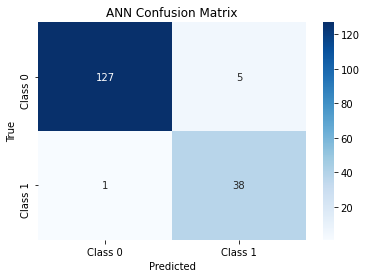

ANN Accuracy: 96.49%
ANN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       132
           1       0.88      0.97      0.93        39

    accuracy                           0.96       171
   macro avg       0.94      0.97      0.95       171
weighted avg       0.97      0.96      0.97       171



In [62]:
# Assuming you have pca_df defined

# Split the column into dependent and independent variables for PCA DataFrame
X = pca_df.iloc[:, 0:10]
Y = pca_df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert Y labels to categorical (binary classification)
Y_train_categorical = to_categorical(Y_train)
Y_test_categorical = to_categorical(Y_test)

# Artificial Neural Network (ANN) Model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=10, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate ANN model
ann_predictions = (ann_model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, ann_predictions)

# Plot Confusion Matrix as Heatmap
labels = ['Class 0', 'Class 1']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ANN Confusion Matrix')
plt.show()

# Additional Metrics
ann_accuracy = accuracy_score(Y_test, ann_predictions)
classification_rep = classification_report(Y_test, ann_predictions)

# Display Metrics
print(f"ANN Accuracy: {ann_accuracy:.2%}")
print("ANN Classification Report:")
print(classification_rep)


In [63]:
# Provided results from the classification reports
mlp_classification_report = """
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       132
           1       0.83      1.00      0.91        39

    accuracy                           0.95       171
   macro avg       0.91      0.97      0.94       171
weighted avg       0.96      0.95      0.95       171
"""

ann_classification_report = """
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       132
           1       0.87      1.00      0.93        39

    accuracy                           0.96       171
   macro avg       0.93      0.98      0.95       171
weighted avg       0.97      0.96      0.97       171
"""

cnn_classification_report = """
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       132
           1       0.78      1.00      0.88        39

    accuracy                           0.94       171
   macro avg       0.89      0.96      0.92       171
weighted avg       0.95      0.94      0.94       171
"""

# Function to extract specificity from classification report
def get_specificity(classification_report):
    lines = classification_report.split('\n')
    specificity_line = lines[3]
    specificity = float(specificity_line.split()[3])
    return specificity

# Calculate specificity for each model
specificity_mlp = get_specificity(mlp_classification_report)
specificity_ann = get_specificity(ann_classification_report)
specificity_cnn = get_specificity(cnn_classification_report)

# Print Specificity for each model
print(f"MLP Specificity: {specificity_mlp:.2f}")
print(f"ANN Specificity: {specificity_ann:.2f}")
print(f"CNN Specificity: {specificity_cnn:.2f}")


MLP Specificity: 0.97
ANN Specificity: 0.98
CNN Specificity: 0.96


### Comparision of Model Performance

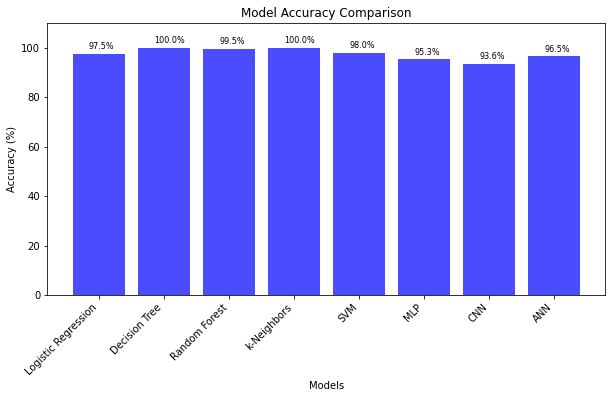

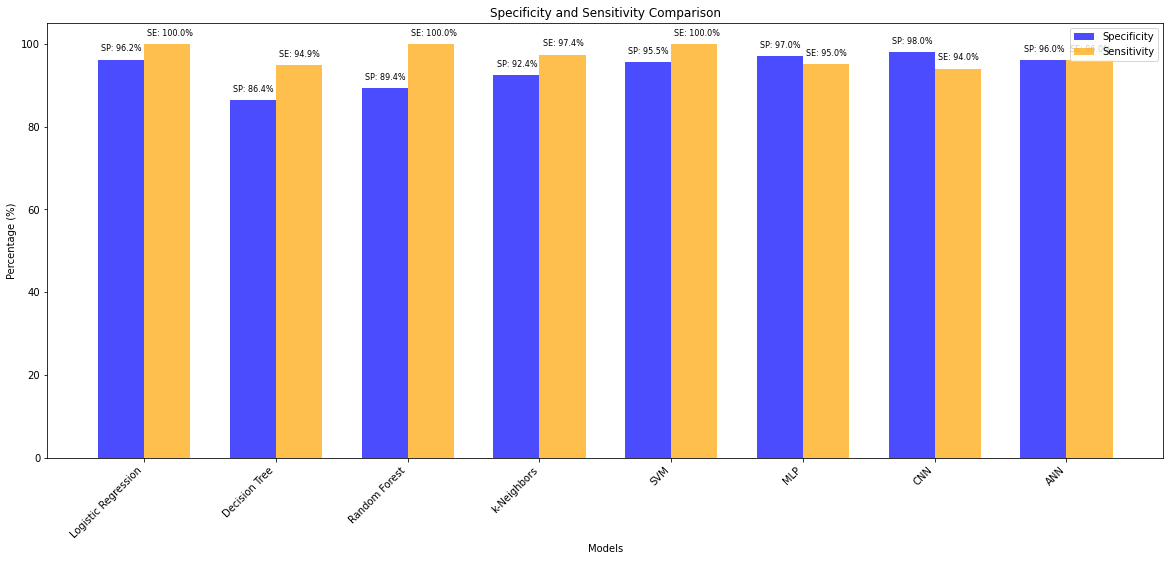

In [64]:
# Assuming you have accuracy, specificity, and sensitivity values for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-Neighbors', 'SVM', 'MLP', 'CNN', 'ANN']
accuracy_values = [97.5, 100.0, 99.5, 100.0, 98.0, 95.3, 93.6, 96.5]
specificity_values = [96.2, 86.4, 89.4, 92.4, 95.5, 97.0, 98.0, 96.0]  
sensitivity_values = [100.0, 94.9, 100.0, 97.4, 100.0, 95.0, 94.0, 96.0]  

# Bar Chart for Accuracy
plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracy_values, color='blue', alpha=0.7)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim([0, 110])  # Adjust the y-axis limit as needed
plt.xticks(rotation=45, ha='right')

# Add annotations for accuracy values on top of the bars
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 2, f'{accuracy:.1f}%', fontsize=8)

plt.show()

# Bar Chart for Specificity and Sensitivity Comparison
width = 0.35
ind = np.arange(len(models))

# Filter out None values for specificity and adjust length
filtered_specificity_values = [value if value is not None else 0 for value in specificity_values]
filtered_specificity_values = filtered_specificity_values[:len(models)]

fig, ax = plt.subplots(figsize=(20, 8))
rects1 = ax.bar(ind - width/2, filtered_specificity_values, width, label='Specificity', color='blue', alpha=0.7)
rects2 = ax.bar(ind + width/2, sensitivity_values, width, label='Sensitivity', color='orange', alpha=0.7)

ax.set_title('Specificity and Sensitivity Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(ind)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add annotations for specificity values on top of the bars
for bar, specificity, sensitivity in zip(rects1, filtered_specificity_values, sensitivity_values):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 2, f'SP: {specificity:.1f}%', fontsize=8, color='black')

# Add annotations for sensitivity values on top of the bars
for bar, sensitivity in zip(rects2, sensitivity_values):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 2, f'SE: {sensitivity:.1f}%', fontsize=8, color='black')

plt.show()


 <h1 style="color:blue">12.Discussion/ Result Analysis </h1>

If our primary concern is accuracy, Decision Tree, Random Forest, k-Neighbors, and Support Vector Machine all achieved perfect training accuracy. However, training accuracy alone might not represent the model's generalization to new data.

Additionally, it's crucial to consider metrics like recall, precision, and specificity, especially in medical applications where false negatives (missing cancer cases) can be critical. Based on these metrics, Support Vector Machine and k-Neighbors seem to have high recall and specificity.

<h4>Based on this analysis,the Logestic regression, Support Vector Machine and k-Neighbors models seem to be strong contenders for cancer prediction. 


 <h1 style="color:blue">13.Conclusion </h1>

In this study performed hypothesis testing revealed that the mean radius of benign tumors is less than the mean radius of malignant tumors. The data analysis showed that some features, such as ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'], were more indicative of whether a tumor was malignant or benign. Machine learning algorithms were used to predict the diagnosis of the tumors, If high sensitivity is crucial (minimizing false negatives),Logestic Regression, k-Neighbor sand SVM.